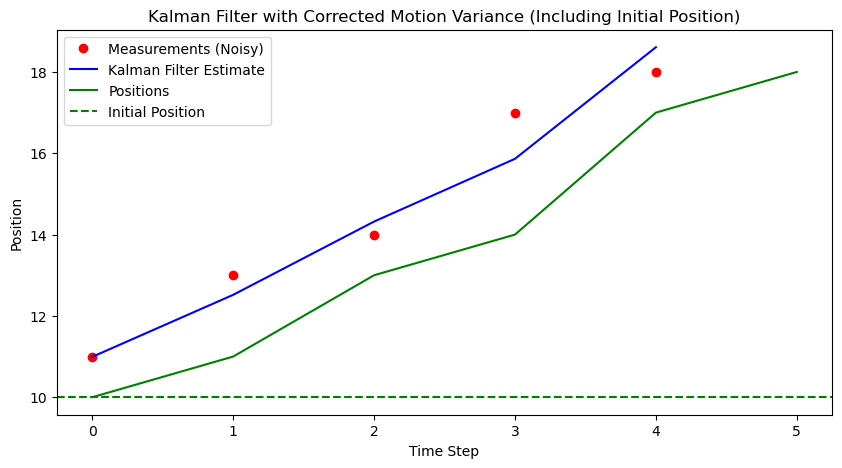

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

# 주어진 함수들
def gaussian(mu, sigma, x):
    coefficient = 1.0 / sqrt(2.0 * pi * sigma)
    exponential = exp(-0.5 * (x-mu) ** 2 / sigma)
    return coefficient * exponential

def update(mean1, var1, mean2, var2):
    new_mean = (var2 * mean1 + var1 * mean2) / (var2 + var1)
    new_var = 1 / (1 / var2 + 1 / var1)
    return (new_mean, new_var)

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return (new_mean, new_var)

initial_position = 10  
measurements = [11, 13, 14, 17, 18]  # 센서 측정 위치 (노이즈 포함)
motions = [1, 2, 1, 3, 1]  # 각 단계에서 이동한 거리

positions = [initial_position]  # 이동된 위치 저장 리스트
for motion in motions:
    positions.append(positions[-1] + motion)  # 이동된 위치 누적

measurement_sig = np.var(measurements)  # 측정값의 분산
motion_sig = np.var(positions)
mu = initial_position  # 초기 위치 반영
sig = 1000.  # 초기 불확실성 (초기에는 매우 불확실함)

estimated_positions = []

for measurement, motion in zip(measurements, motions):
    # 🔹 측정 업데이트 (Measurement Update)
    mu, sig = update(mu, sig, measurement, measurement_sig)
    estimated_positions.append(mu)
    
    # 🔹 이동 예측 (Prediction Step) - 이동 후 위치의 분산을 반영
    mu, sig = predict(mu, sig, motion, motion_sig)

# 그래프 출력
plt.figure(figsize=(10, 5))
plt.plot(range(len(measurements)), measurements, 'ro', label="Measurements (Noisy)")
plt.plot(range(len(estimated_positions)), estimated_positions, 'b-', label="Kalman Filter Estimate")
plt.plot(range(len(positions)), positions, 'g-', label="Positions")
plt.axhline(initial_position, color='green', linestyle='dashed', label="Initial Position")
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.legend()
plt.title("Kalman Filter with Corrected Motion Variance (Including Initial Position)")
plt.show()